<a href="https://colab.research.google.com/github/aysedata/NLP/blob/main/NLP__SENTIMENT_ANALYSIS_PROJECT_aysedata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

___

# WELCOME!

___

Welcome to the "***Sentiment Analysis and Classification***" study.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this study is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that we need to convert text files into numeric feature vectors to run machine learning algorithms.

We will build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***) and **Deep Learning algorithms**.

Before diving into the project, let's take a look at the Determines and Tasks.

## Determines

The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if we want, we can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning***.

Classically, we can start to know the data after doing the import and load operations. 
We need to do missing value detection for Review Text, which is the only variable we need to care about. We can drop other variables.

We will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, we will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, we will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---

## Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Model Comparison

---
---

# Sentiment analysis of women's clothes reviews


In this study we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [2]:
# !pip install pyforest
# 1-Import Libraies
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import missingno as msno 

from sklearn.compose import make_column_transformer

# Scaling
from sklearn.preprocessing import scale 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PowerTransformer 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler


# Importing plotly and cufflinks in offline mode
import plotly.express as px
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

# Figure&Display options
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# !pip install termcolor
!pip install colorama
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored

import ipywidgets
from ipywidgets import interact

import nltk
nltk.download('punkt')
nltk.download("stopwords")
nltk.download('all')
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from collections import Counter
from wordcloud import WordCloud 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Some Useful User Defined Functions

In [3]:
## Some Useful Functions

###############################################################################

def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]

###############################################################################

def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'red', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    
        
def multicolinearity_control(df):
    feature =[]
    collinear=[]
    for col in df.corr().columns:
        for i in df.corr().index:
            if (abs(df.corr()[col][i])> .9 and abs(df.corr()[col][i]) < 1):
                    feature.append(col)
                    collinear.append(i)
                    print(colored(f"Multicolinearity alert in between:{col} - {i}", 
                                  "red", attrs=['bold']), df.shape,'\n',
                                  colored('-'*79, 'red', attrs=['bold']), sep='')

def duplicate_values(df):
    print(colored("Duplicate check...", attrs=['bold']), sep='')
    duplicate_values = df.duplicated(subset=None, keep='first').sum()
    if duplicate_values > 0:
        df.drop_duplicates(keep='first', inplace=True)
        print(duplicate_values, colored("Duplicates were dropped!"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
    else:
        print(colored("There are no duplicates"),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')     
        
def drop_columns(df, drop_columns):
    if drop_columns !=[]:
        df.drop(drop_columns, axis=1, inplace=True)
        print(drop_columns, 'were dropped')
    else:
        print(colored('We will now check the missing values and if necessary will drop related columns!', attrs=['bold']),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')
        
def drop_null(df, limit):
    print('Shape:', df.shape)
    for i in df.isnull().sum().index:
        if (df.isnull().sum()[i]/df.shape[0]*100)>limit:
            print(df.isnull().sum()[i], 'percent of', i ,'null and were dropped')
            df.drop(i, axis=1, inplace=True)
            print('new shape:', df.shape)       
    print('New shape after missing value control:', df.shape)
        
###############################################################################

# To view summary information about the column

def first_look(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [5]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews (1).csv")

In [ ]:
#df = pd.read_csv("../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv")

In [6]:
df.tail()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
23481,23481,1104,34,Great dress for many occasions,I was very happy to snag this dress at such a great price! it's very easy to slip on and has a very flattering cut and color combo.,5,1,0,General Petite,Dresses,Dresses
23482,23482,862,48,Wish it was made of cotton,"It reminds me of maternity clothes. soft, stretchy, shiny material. cut is flattering and drapes nicely. i only found one button to close front... looked awkward. nice long sleeves.\nnot for me bu...",3,1,0,General Petite,Tops,Knits
23483,23483,1104,31,"Cute, but see through","This fit well, but the top was very see through. this never would have worked for me. i'm glad i was able to try it on in the store and didn't order it online. with different fabric, it would have...",3,0,1,General Petite,Dresses,Dresses
23484,23484,1084,28,"Very cute dress, perfect for summer parties and we","I bought this dress for a wedding i have this summer, and it's so cute. unfortunately the fit isn't perfect. the medium fits my waist perfectly, but was way too long and too big in the bust and sh...",3,1,2,General,Dresses,Dresses
23485,23485,1104,52,Please make more like this one!,"This dress in a lovely platinum is feminine and fits perfectly, easy to wear and comfy, too! highly recommend!",5,1,22,General Petite,Dresses,Dresses


In [7]:
df.sample(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
11916,11916,860,61,My favorite cut and style for me,"I loved the fabric, cut and style of these shirts, the diamond gather in the front is a problem though. i just went under and snipped the elastic that is sewn on that design to relax it a bit. thi...",3,1,0,General Petite,Tops,Knits
15950,15950,1035,27,Amazing,The fit on these is amazing and the color is great too! sometimes the fading is too much on jeans but this is just right. the rise fits really well and the length is great! love pilcro!,5,1,3,General Petite,Bottoms,Jeans
14890,14890,833,51,O.m.g. soooo beautiful,"I saw this top at my local retailer and instantly fell in love. i didn't even try it on first because i just ""knew"". when i finally got home and tried it on, it didn't disappoint. ultra feminine a...",5,1,0,General,Tops,Blouses
2876,2876,573,34,Ok,"I was so excited to receive this in the mail as it had been on backorder for awhile. the dress is beautiful, but run smalls the buttons on the back are nearly impossible to fasten. if you are sing...",3,0,4,General Petite,Trend,Trend
17649,17649,918,53,Picture a tad misleading....,"If you look closely at the photos, the buttons are only shown as applied halfway down the placket but the buttons run the entire length of this fabulous sweater by moth. the sweater fits tts; i am...",5,1,2,General,Tops,Fine gauge


### Data Wrangling

In [11]:
first_looking(df)
duplicate_values(df)
drop_columns(df,[])
drop_null(df, 90)

Shape:(23486, 11)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB
None
------------------------------------------

In [9]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

- The "Unnamed:_0" column contains completely unique values and contains the same information as the index. Alsa "clothing_id" columns has unique values over 1200. I'm dropping this columns because they won't work for us as they stand.

In [12]:
df.drop(['unnamed:_0', 'clothing_id'], axis = 1, inplace=True)

In [13]:
df.shape

(23486, 9)

In [14]:
df = df.rename(columns = {'Review Text' : 'text', 'recommended_ind' : 'recommended', 
                          'positive_feedback_count' : 'feedback_count', 'division_name' : 'division', 
                          'department_name' : 'department', 'class_name' :'class'})

In [15]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,23486.000,43.199,12.280,18.000,34.000,41.000,52.000,99.000
rating,23486.000,4.196,1.110,1.000,4.000,5.000,5.000,5.000
recommended,23486.000,0.822,0.382,0.000,1.000,1.000,1.000,1.000
feedback_count,23486.000,2.536,5.702,0.000,0.000,1.000,3.000,122.000


- Columns with ordinal information, although the "rating" and "recommended_ind" columns are encoded as numeric. 

In [16]:
df.describe(include=object).T

,count,unique,top,freq
title,19676,13993,Love it!,136
review_text,22641,22634,Perfect fit and i've gotten so many compliments. i buy all my suits from here now!,3
division,23472,3,General,13850
department,23472,6,Tops,10468
class,23472,20,Dresses,6319


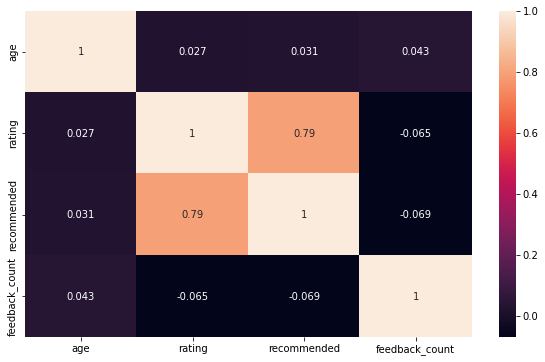

In [17]:
sns.heatmap(df.corr(), annot=True);

- Let us have look at the columns remaining in the dataset.

In [18]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

***age***
- Positive Integer variable of the reviewers age.

In [19]:
first_look("age")

column name    :  age
--------------------------------
per_of_nulls   :  % 0.0
num_of_nulls   :  0
num_of_uniques :  77
39    1269
35     909
36     842
34     804
38     780
37     766
41     741
33     725
46     713
42     651
32     631
48     626
40     617
44     617
43     579
31     569
47     564
53     560
45     529
29     513
49     490
56     471
52     442
28     428
26     423
30     407
50     398
54     395
51     393
57     363
27     344
60     341
62     338
25     331
55     328
59     321
58     277
66     276
64     247
23     247
24     245
63     239
61     227
65     226
67     157
22     146
68     141
69     113
20     108
21     102
70      93
71      51
74      50
72      46
83      43
19      40
73      40
75      26
77      18
78      15
79      15
82      13
76      10
80      10
85       6
84       6
89       5
81       5
91       5
18       4
87       4
94       3
93       2
90       2
86       2
99       2
92       1
Name: age, dtype: int64


In [ ]:
df.age.describe().T

In [ ]:
px.histogram(df, x = df.age)

In [ ]:
pd.crosstab(df.age, df.recommended).iplot(kind="bar")

***rating*** 
- Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

In [ ]:
first_look("rating")

In [ ]:
df.rating.describe().T

In [ ]:
px.histogram(df, x = df.rating)

In [ ]:
pd.crosstab(df.rating, df.recommended).iplot(kind="bar")

***recommended*** 
- Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

In [ ]:
first_look("recommended")

In [ ]:
df.recommended.describe().T

In [ ]:
px.histogram(df, x = df.recommended)

***feedback_count:***
- Positive Integer documenting the number of other customers who found this review positive.

In [ ]:
first_look("feedback_count")

In [ ]:
df.feedback_count.describe().T

In [ ]:
px.histogram(df, x = df.feedback_count)

In [ ]:
pd.crosstab(df.feedback_count, df.recommended).iplot(kind="bar")

***division*** 
- Categorical name of the product high level division.

In [ ]:
first_look("division")

In [ ]:
df.division.describe().T

In [ ]:
px.histogram(df, x = df.division)

In [ ]:
pd.crosstab(df.division, df.recommended).iplot(kind="bar")

***department***
- Categorical name of the product department name

In [ ]:
first_look("department")

In [ ]:
df.department.describe().T

In [ ]:
px.histogram(df, x = df.department)

In [ ]:
pd.crosstab(df.department, df.recommended).iplot(kind="bar")

***class***
- Categorical name of the product class name.

In [ ]:
first_look("class")

In [ ]:
df["class"].describe().T

In [ ]:
px.histogram(df, x = df["class"])

In [ ]:
pd.crosstab(df["class"], df.recommended).iplot(kind="bar")

***title*** 
- String variable for the title of the review.

In [ ]:
first_look("title")

In [ ]:
df.title.describe().T

***review_text*** 
- String variable for the review body.

In [ ]:
first_look("review_text")

In [ ]:
df.review_text.describe().T

#### Check Proportion of Target Class Variable:

In [ ]:
df.columns

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommended".

In [ ]:
# recommended : 
# Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

print(df.recommended.value_counts())

plt.figure(figsize=(10,10))

explode = [0,0.1]
plt.pie(df.recommended.value_counts(), explode=explode,autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['1 : recommended','0 : not recommended'])
plt.title('Recommendation Distribution')
plt.axis('off');

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame we will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. We can do the missing value detection operations from now on. We can also rename the column names if we want.

### Feature Selection and Rename Column Name

In [20]:
df.columns

Index(['age', 'title', 'review_text', 'rating', 'recommended',
       'feedback_count', 'division', 'department', 'class'],
      dtype='object')

In [21]:
df_ml = df.copy()

# df_ml = df[['review_text', 'recommended']].copy()

In [22]:
drop_columns = ['age', 
                'title', 
                'rating',
                'feedback_count', 
                'division',
                'department',
                'class']

In [23]:
df_ml.drop(drop_columns, axis = 1, inplace = True)

In [24]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_text  22641 non-null  object
 1   recommended  23486 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 367.1+ KB


In [25]:
df_ml.rename(columns = {'review_text':'text', 'recommended':'recommend'}, inplace = True)

In [26]:
df_ml.columns

Index(['text', 'recommend'], dtype='object')

---
---


### Missing Value Detection

In [27]:
missing_values(df_ml)

,Missing_Number,Missing_Percent
text,845,0.036


In [28]:
df_ml.isnull().melt(value_name="missing")

,variable,missing
0,text,False
1,text,False
2,text,False
3,text,False
4,text,False
...,...,...
46967,recommend,False
46968,recommend,False
46969,recommend,False
46970,recommend,False


In [ ]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df_ml.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r");

In [29]:
df_ml = df_ml.dropna()

# df_ml = df_ml.dropna(subset=['text'], axis=0)
# df_ml = df_ml.reset_index(drop=True)

In [30]:
missing_values(df_ml)

,Missing_Number,Missing_Percent


In [31]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22641 entries, 0 to 23485
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       22641 non-null  object
 1   recommend  22641 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 530.6+ KB


In [32]:
df_ml["text"].str.isspace().sum()
df_ml[df_ml["text"].str.isspace() == True].index

Int64Index([], dtype='int64')

---
---


## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.


- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 

### Tokenization, Noise Removal, Lexicon Normalization

In [33]:
df_ml.head()

,text,recommend
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length...",1
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be outrageously small. so small in fact that i co...,0
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1
4,This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any cardigan. love this shirt!!!,1


In [59]:
stop_words = stopwords.words('english')

In [35]:
def cleaning(data):
    
    #1. Tokenize
    text_tokens = word_tokenize(data.replace("'", "").lower()) 
        
    #2. Remove Puncs
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]  
    
    #3. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #4. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
        
    #joining
    return " ".join(text_cleaned)

In [1]:
df_ml["text"] = df_ml["text"].apply(cleaning)
df_ml["text"].head()

### Rare Words

In [37]:
" ".join(df_ml["text"]).split()

['Absolutely',
 'wonderful',
 '-',
 'silky',
 'and',
 'sexy',
 'and',
 'comfortable',
 'Love',
 'this',
 'dress!',
 "it's",
 'sooo',
 'pretty.',
 'i',
 'happened',
 'to',
 'find',
 'it',
 'in',
 'a',
 'store,',
 'and',
 "i'm",
 'glad',
 'i',
 'did',
 'bc',
 'i',
 'never',
 'would',
 'have',
 'ordered',
 'it',
 'online',
 'bc',
 "it's",
 'petite.',
 'i',
 'bought',
 'a',
 'petite',
 'and',
 'am',
 '5\'8".',
 'i',
 'love',
 'the',
 'length',
 'on',
 'me-',
 'hits',
 'just',
 'a',
 'little',
 'below',
 'the',
 'knee.',
 'would',
 'definitely',
 'be',
 'a',
 'true',
 'midi',
 'on',
 'someone',
 'who',
 'is',
 'truly',
 'petite.',
 'I',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'really',
 'wanted',
 'it',
 'to',
 'work',
 'for',
 'me.',
 'i',
 'initially',
 'ordered',
 'the',
 'petite',
 'small',
 '(my',
 'usual',
 'size)',
 'but',
 'i',
 'found',
 'this',
 'to',
 'be',
 'outrageously',
 'small.',
 'so',
 'small',
 'in',
 'fact',
 'that',
 'i',
 'could',
 'not'

In [38]:
rare_words = pd.Series(" ".join(df_ml["text"]).split()).value_counts()
rare_words

the            74698
i              49630
and            48505
a              42632
it             37302
               ...  
kindof             1
lengh,,            1
33-year-old        1
gushing,           1
platinum           1
Length: 38473, dtype: int64

In [39]:
rare_words = rare_words[rare_words <= 2] 

In [40]:
rare_words.index

Index(['great--', 'nonetheless...', 'gorgeous...', '(4)', 'northeast',
       'dismay', 'unsightly', '150#', 'navel,', 'seems,',
       ...
       'delight-', 'minmized', '12/14,', 'boho/70s/vintage', 'shiny!?',
       'kindof', 'lengh,,', '33-year-old', 'gushing,', 'platinum'],
      dtype='object', length=26593)

In [41]:
df_ml["text"] = df_ml["text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df_ml["text"].head()

0                                                                                                                                                      Absolutely wonderful - silky and sexy and comfortable
1    Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8". i love the length on ...
2    I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be small. so small in fact that i could not zip i...
3                                                                               I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!
4           This shirt is very flattering to all due to the adjustable front tie. it is the perfect length to wear with leggings and it is sleeveless so it pairs well with any card

## 4. WordCloud - Repetition of Words

Now we'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

We will create separate word clouds for positive and negative reviews. We can qualify a review as positive or negative, by looking at its recommended status.

We can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


### Detect Reviews (positive and negative separately)

In [42]:
df_ml[df_ml["recommend"] == 0].head(3)

,text,recommend
2,I had such high hopes for this dress and really wanted it to work for me. i initially ordered the petite small (my usual size) but i found this to be small. so small in fact that i could not zip i...,0
5,"I love tracy reese dresses, but this one is not for the very petite. i am just under 5 feet tall and usually wear a 0p in this brand. this dress was very pretty out of the package but its a lot of...",0
10,Dress runs small esp where the zipper area runs. i ordered the sp which typically fits me and it was very tight! the material on the top looks and feels very cheap that even just pulling on it wil...,0


In [43]:
df_ml[df_ml["recommend"] == 1].head(3)

,text,recommend
0,Absolutely wonderful - silky and sexy and comfortable,1
1,"Love this dress! it's sooo pretty. i happened to find it in a store, and i'm glad i did bc i never would have ordered it online bc it's petite. i bought a petite and am 5'8"". i love the length on ...",1
3,"I love, love, love this jumpsuit. it's fun, flirty, and fabulous! every time i wear it, i get nothing but great compliments!",1


### Collect Words (positive and negative separately)

In [44]:
" ".join(df_ml["text"]).split()

['Absolutely',
 'wonderful',
 '-',
 'silky',
 'and',
 'sexy',
 'and',
 'comfortable',
 'Love',
 'this',
 'dress!',
 "it's",
 'sooo',
 'pretty.',
 'i',
 'happened',
 'to',
 'find',
 'it',
 'in',
 'a',
 'store,',
 'and',
 "i'm",
 'glad',
 'i',
 'did',
 'bc',
 'i',
 'never',
 'would',
 'have',
 'ordered',
 'it',
 'online',
 'bc',
 "it's",
 'petite.',
 'i',
 'bought',
 'a',
 'petite',
 'and',
 'am',
 '5\'8".',
 'i',
 'love',
 'the',
 'length',
 'on',
 'me-',
 'hits',
 'just',
 'a',
 'little',
 'below',
 'the',
 'knee.',
 'would',
 'definitely',
 'be',
 'a',
 'true',
 'midi',
 'on',
 'someone',
 'who',
 'is',
 'truly',
 'petite.',
 'I',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'really',
 'wanted',
 'it',
 'to',
 'work',
 'for',
 'me.',
 'i',
 'initially',
 'ordered',
 'the',
 'petite',
 'small',
 '(my',
 'usual',
 'size)',
 'but',
 'i',
 'found',
 'this',
 'to',
 'be',
 'small.',
 'so',
 'small',
 'in',
 'fact',
 'that',
 'i',
 'could',
 'not',
 'zip',
 'it',


In [45]:
positive_words =" ".join(df_ml[df_ml["recommend"] == 1].text).split()
positive_words

['Absolutely',
 'wonderful',
 '-',
 'silky',
 'and',
 'sexy',
 'and',
 'comfortable',
 'Love',
 'this',
 'dress!',
 "it's",
 'sooo',
 'pretty.',
 'i',
 'happened',
 'to',
 'find',
 'it',
 'in',
 'a',
 'store,',
 'and',
 "i'm",
 'glad',
 'i',
 'did',
 'bc',
 'i',
 'never',
 'would',
 'have',
 'ordered',
 'it',
 'online',
 'bc',
 "it's",
 'petite.',
 'i',
 'bought',
 'a',
 'petite',
 'and',
 'am',
 '5\'8".',
 'i',
 'love',
 'the',
 'length',
 'on',
 'me-',
 'hits',
 'just',
 'a',
 'little',
 'below',
 'the',
 'knee.',
 'would',
 'definitely',
 'be',
 'a',
 'true',
 'midi',
 'on',
 'someone',
 'who',
 'is',
 'truly',
 'petite.',
 'I',
 'love,',
 'love,',
 'love',
 'this',
 'jumpsuit.',
 "it's",
 'fun,',
 'flirty,',
 'and',
 'fabulous!',
 'every',
 'time',
 'i',
 'wear',
 'it,',
 'i',
 'get',
 'nothing',
 'but',
 'great',
 'compliments!',
 'This',
 'shirt',
 'is',
 'very',
 'flattering',
 'to',
 'all',
 'due',
 'to',
 'the',
 'adjustable',
 'front',
 'tie.',
 'it',
 'is',
 'the',
 'perfect

In [46]:
negative_words = " ".join(df_ml[df_ml["recommend"] == 0].text).split()
negative_words 

['I',
 'had',
 'such',
 'high',
 'hopes',
 'for',
 'this',
 'dress',
 'and',
 'really',
 'wanted',
 'it',
 'to',
 'work',
 'for',
 'me.',
 'i',
 'initially',
 'ordered',
 'the',
 'petite',
 'small',
 '(my',
 'usual',
 'size)',
 'but',
 'i',
 'found',
 'this',
 'to',
 'be',
 'small.',
 'so',
 'small',
 'in',
 'fact',
 'that',
 'i',
 'could',
 'not',
 'zip',
 'it',
 'up!',
 'i',
 'reordered',
 'it',
 'in',
 'petite',
 'medium,',
 'which',
 'was',
 'just',
 'ok.',
 'overall,',
 'the',
 'top',
 'half',
 'was',
 'comfortable',
 'and',
 'fit',
 'nicely,',
 'but',
 'the',
 'bottom',
 'half',
 'had',
 'a',
 'very',
 'tight',
 'under',
 'layer',
 'and',
 'several',
 'somewhat',
 'cheap',
 'over',
 'layers.',
 'imo,',
 'a',
 'major',
 'design',
 'flaw',
 'was',
 'the',
 'net',
 'over',
 'layer',
 'sewn',
 'directly',
 'into',
 'the',
 'zipper',
 '-',
 'it',
 'c',
 'I',
 'love',
 'tracy',
 'reese',
 'dresses,',
 'but',
 'this',
 'one',
 'is',
 'not',
 'for',
 'the',
 'very',
 'petite.',
 'i',
 'a

In [47]:
len(positive_words)

1083625

In [48]:
len(negative_words)

248154

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [49]:
review_text = df_ml["text"]

In [50]:
all_words = " ".join(review_text)

In [51]:
all_words[:100]

"Absolutely wonderful - silky and sexy and comfortable Love this dress! it's sooo pretty. i happened "

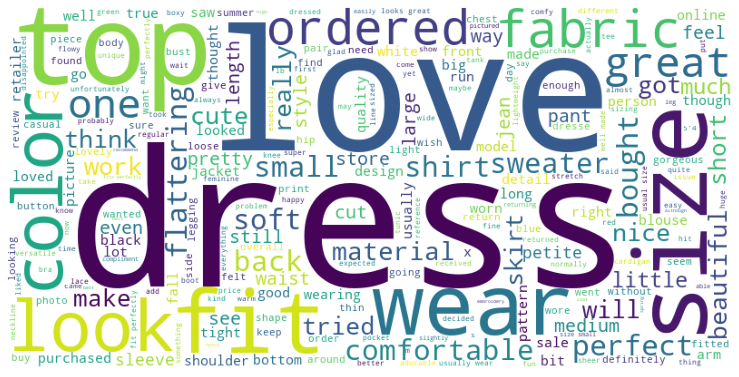

In [52]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

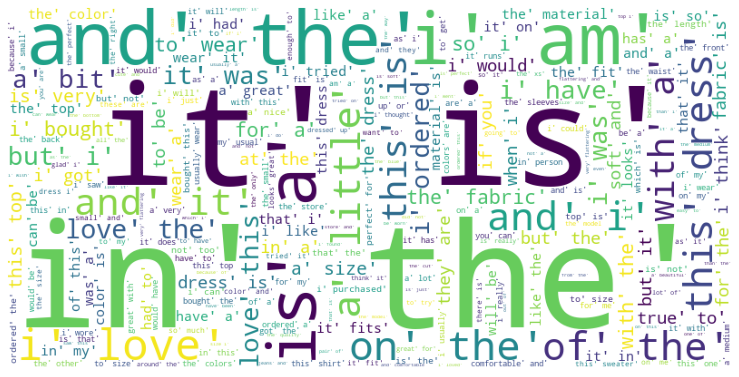

In [53]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(positive_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

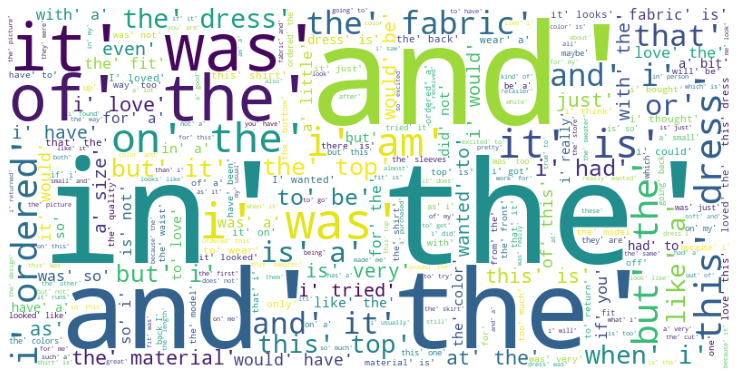

In [54]:
wordcloud = WordCloud(width = 800, height = 400, background_color = "white", max_words = 250).generate(str(negative_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

### Counting words

In [2]:
counter_all = Counter(word_tokenize(all_words))
counter_all.most_common(50)

## 5. Sentiment Classification with Machine Learning and Deep Learning

Before moving on to modeling, as data preprocessing steps we will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. 

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, we need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that we will use here is to represent each text as a vector of word counts.

At this moment, we have our review text column as a token (which has no punctuations and stopwords). We can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. We can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

After performing data preprocessing, we will build our models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model.

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [ ]:
X = df_ml["text"].values
y = df_ml["recommend"].map({0:1, 1:0}).values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify = y, random_state = 101)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer()

X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [ ]:
X_train_count

In [ ]:
X_test_count

In [ ]:
len(X_train_count.toarray())

In [ ]:
X_train_count.toarray()

In [ ]:
len(X_test_count.toarray())

In [ ]:
X_test_count.toarray()

In [ ]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

In [ ]:
X_train

### TF-IDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [ ]:
X_train_tf_idf.toarray()

In [ ]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

## Modelling with Machine Learning Models

In [ ]:
from sklearn.metrics import plot_confusion_matrix, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score, precision_score, average_precision_score

In [ ]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))
    plot_confusion_matrix(model, X_test, y_test, cmap="plasma")

## Logistic Regression

### CountVectorizer 

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg_count = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = 'balanced', random_state = 101)
logreg_count.fit(X_train_count,y_train)

In [ ]:
print("LogReg_Count Model")
print ("------------------")
eval(logreg_count, X_train_count, X_test_count)

In [ ]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      LogisticRegression(C = 0.1, max_iter = 1000, class_weight= "balanced", random_state=101),
      classes = logreg_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = logreg_count.predict(X_test_count)
log_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_AP = viz.score_

In [ ]:
print("viz.score_       : ", viz.score_)
print("LogReg_Count_rec : ", log_count_rec)
print("LogReg_Count_f1  : ", log_count_f1)
print("LogReg_Count_AP  : ", log_AP)

### CountVectorizer  ***Cross Validation***

In [ ]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-0":
        log_count_rec = scores
    elif i == "f1-0":
        log_count_f1 = scores
    print(f" {i:20} score for LogReg_Count : {scores}\n")

In [ ]:
import random
import pylab as pl
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 0.1, max_iter = 1000, class_weight = "balanced", random_state = 101),
    classes = logreg_count.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
LogReg_Count_AP = viz.score_
LogReg_Count_AP

### TF-IDF 

In [ ]:
logreg_tfidf = LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state = 101)
logreg_tfidf.fit(X_train_tf_idf,y_train)

In [ ]:
print("LogReg_TFIDF Model")
print("------------------")
eval(logreg_tfidf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter = 1000, class_weight = "balanced", random_state=101),
    classes = logreg_count.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = logreg_tfidf.predict(X_test_tf_idf)
log_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
log_tf_idf_AP = viz.score_

In [ ]:
print("viz.score_       : ", viz.score_)
print("LogReg_TFIDF_rec : ", log_tf_idf_rec)
print("LogReg_TFIDF_f1  : ", log_tf_idf_f1)
print("LogReg_TFIDF_AP  : ", log_tf_idf_AP)

### TF-IDF ***Cross Validation***

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced")
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        log_tfidf_rec = scores
    elif i == "f1-1":
        log_tfidf_f1 = scores
    print(f" {i:20} score for LogReg_TFIDF : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
    LogisticRegression(C = 1, max_iter = 1000, random_state = 101, class_weight = "balanced"),
    classes = logreg_tfidf.classes_,
    per_class = True,
    cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
LogReg_TFIDF_AP = viz.score_
LogReg_TFIDF_AP

## Naive Bayes 

### Countvectorizer ***MultinomialNB***

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
nbmulti_count = MultinomialNB()
nbmulti_count.fit(X_train_count,y_train)

In [ ]:
print("NBMulti_Count Model")
print("-------------------")
eval(nbmulti_count, X_train_count, X_test_count)

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nbmulti_count.classes_,  
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = nbmulti_count.predict(X_test_count)
nb_multi_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_count_AP = viz.score_

In [ ]:
print("viz.score_         : ", viz.score_)
print("NBMulti_Count_rec : ", nb_multi_count_rec)
print("NBMulti_Count_f1  : ", nb_multi_count_f1)
print("NBMulti_Count_AP  : ", nb_multi_count_AP)

### Countvectorize ***MultinomialNB with Cross Validation***

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label=0),
                 'recall-0': make_scorer(recall_score, pos_label=0),
                 'f1-0': make_scorer(f1_score, pos_label=0),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbm_count_rec = scores
    elif i == "f1-1":
        nbm_count_f1 = scores
    print(f" {i:20} score for NBMulti_Count : {scores}\n")

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    MultinomialNB(),
    classes = nbmulti_count.classes_,  
    per_class = True,
    cmap = "Set1"
)

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
NBMulti_Count_AP = viz.score_
NBMulti_Count_AP

### Countvectorize ***BernoulliNB***

In [ ]:
from sklearn.naive_bayes import BernoulliNB

In [ ]:
nbberno_count = BernoulliNB()
nbberno_count.fit(X_train_count,y_train)

In [ ]:
print("NBBerno_Count Model")
print("-------------------")
eval(nbberno_count, X_train_count, X_test_count)

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_count.classes_,  
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = nbberno_count.predict(X_test_count)
nb_ber_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_count_AP = viz.score_

In [ ]:
print("viz.score_        : ", viz.score_)
print("NBBerno_Count_rec : ", nb_ber_count_rec)
print("NBBerno_Count_f1  : ", nb_ber_count_f1)
print("NBBerno_Count_AP  : ", nb_ber_count_AP)

### Countvectorize ***BernoulliNB with Cross Validation***

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbb_count_rec = scores
    elif i == "f1-1":
        nbb_count_f1 = scores
    print(f" {i:20} score for NBBerno_Count : {scores}\n")

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_count.classes_,  
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
NBBerno_Count_AP = viz.score_
NBBerno_Count_AP

### TF-IDF ***MultinomialNB***

In [ ]:
nbmulti_tfidf = MultinomialNB()
nbmulti_tfidf.fit(X_train_tf_idf,y_train)

In [ ]:
print("NBMulti_TFIDF MODEL")
print("-------------------")
eval(nbmulti_tfidf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nbmulti_tfidf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = nbmulti_tfidf.predict(X_test_tf_idf)
nb_multi_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_multi_tf_idf_AP = viz.score_

In [ ]:
print("viz.score_        : ", viz.score_)
print("NBMulti_TFIDF_rec : ", nb_multi_tf_idf_rec)
print("NBMulti_TFIDF_f1  : ", nb_multi_tf_idf_f1)
print("NBMulti_TFIDF_AP  : ", nb_multi_tf_idf_AP)

### TF-IDF ***MultinomialNB with Cross Validation***

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = MultinomialNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbm_tfidf_rec = scores
    elif i == "f1-1":
        nbm_tfidf_f1 = scores
    print(f" {i:20} score for NBMulti_TFIDF : {scores}\n")

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      MultinomialNB(),
      classes = nbmulti_tfidf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
NBMulti_TFIDF_AP = viz.score_
NBMulti_TFIDF_AP

### TF-IDF ***BernoulliNB***

In [ ]:
nbberno_tfidf = BernoulliNB()
nbberno_tfidf.fit(X_train_tf_idf,y_train)

In [ ]:
print("NBBerno_TFIDF MODEL")
print("-------------------")
eval(nbberno_tfidf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_tfidf.classes_, 
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = nbberno_tfidf.predict(X_test_tf_idf)
nb_ber_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
nb_ber_tf_idf_AP = viz.score_

In [ ]:
print("viz.score_        : ", viz.score_)
print("NBBerno_TFIDF_rec : ", nb_multi_tf_idf_rec)
print("NBBerno_TFIDF_f1  : ", nb_multi_tf_idf_f1)
print("NBBerno_TFIDF_AP  : ", nb_multi_tf_idf_AP)

### TF-IDF ***BernoulliNB with Cross Validation***

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = BernoulliNB()
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        nbb_tfidf_rec = scores
    elif i == "f1-1":
        nbb_tfidf_f1 = scores
    print(f" {i:20} score for NBBerno_TFIDF : {scores}\n")

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
      BernoulliNB(),
      classes = nbberno_tfidf.classes_, 
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
NBBerno_TFIDF_AP = viz.score_
NBBerno_TFIDF_AP

## Support Vector Machine (SVM)

### Countvectorizer

In [ ]:
from sklearn.svm import LinearSVC
svc_count = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_count.fit(X_train_count,y_train)

In [ ]:
print("SVC_Count Model")
print("---------------")
eval(svc_count, X_train_count, X_test_count)

In [ ]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = svc_count.predict(X_test_count)
svc_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
svc_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
svc_count_AP = viz.score_

In [ ]:
print("viz.score_    : ", viz.score_)
print("SVC_Count_rec : ", svc_count_rec)
print("SVC_Count_f1  : ", svc_count_f1)
print("SVC_Count_AP  : ", svc_count_AP)

### CountVectorizer ***With Cross Validation***

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_count_rec = scores
    elif i == "f1-1":
        svc_count_f1 = scores
    print(f" {i:20} score for SVC_Count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
SVC_Count_AP = viz.score_
SVC_Count_AP

### TD-IDF

In [ ]:
svc_tf_idf = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)  
svc_tf_idf.fit(X_train_tf_idf,y_train)

In [ ]:
print("SVC_TFIDF Model")
print("---------------")
eval(svc_tf_idf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_tf_idf.classes_,
      per_class = True,
      cmap = "Set1"
)

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = svc_tf_idf.predict(X_test_tf_idf)
svc_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
svc_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
svc_tf_idf_AP = viz.score_

In [ ]:
print("viz.score_     : ", viz.score_)
print("SVC_TFIDF_rec   : ", svc_tf_idf_rec)
print("SVC_TFIDF_f1   : ", svc_tf_idf_f1)
print("SVC_TFIDF_AP   : ", svc_tf_idf_AP)

### TFIDF ***With Cross Validation***

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        svc_tfidf_rec = scores
    elif i == "f1-1":
        svc_tfidf_f1 = scores
    print(f" {i:20} score for SVC_TFIDF : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
      LinearSVC(C = 0.01, class_weight = "balanced", random_state = 101),
      classes = svc_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
SVC_TFIDF_AP = viz.score_
SVC_TFIDF_AP

## Random Forest

### CountVectorizer

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_count = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_count.fit(X_train_count, y_train)

In [ ]:
print("RF_Count Model")
print("--------------")
eval(rf_count, X_train_count, X_test_count)

In [ ]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = rf_count.predict(X_test_count)
rf_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
rf_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
rf_count_AP = viz.score_

In [ ]:
print("viz.score_   : ", viz.score_)
print("RF_Count_rec : ", rf_count_rec)
print("RF_Count_f1  : ", rf_count_f1)
print("RF_Count_AP  : ", rf_count_AP)

### CountVectorizer with Cross Validation

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_count_rec = scores
    elif i == "f1-1":
        rf_count_f1 = scores
    print(f" {i:20} score for RF_Count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(200, max_depth = 12, random_state = 42, n_jobs = -1, class_weight="balanced"),
      classes = rf_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
RF_Count_AP = viz.score_
RF_Count_AP

### TF-IDF

In [ ]:
rf_tf_idf = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
rf_tf_idf.fit(X_train_tf_idf, y_train)

In [ ]:
print("RF_TFIDF Model")
print("--------------")
eval(rf_tf_idf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = rf_tf_idf.predict(X_test_tf_idf)
rf_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
rf_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
rf_tf_idf_AP = viz.score_

In [ ]:
print("viz.score_   : ", viz.score_)
print("RF_TFIDF_rec : ", rf_tf_idf_rec)
print("RF_TFIDF_f1  : ", rf_tf_idf_f1)
print("RF_TFIDF_AP  : ", rf_tf_idf_AP)

### TF-IDF with Cross Validation

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        rf_tfidf_rec = scores
    elif i == "f1-1":
        rf_tfidf_f1 = scores
    print(f" {i:20} score for RF_TFIDF : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
      RandomForestClassifier(n_estimators = 200, max_depth = 11, class_weight = "balanced", random_state = 101, n_jobs = -1),
      classes = rf_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
RF_TFIDF_AP = viz.score_
RF_TFIDF_AP

## Ada Boosting

### CountVectorizer

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_count = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_count.fit(X_train_count, y_train)

In [ ]:
print("Ada_Count Model")
print("---------------")
eval(ada_count, X_train_count, X_test_count)

In [ ]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
y_pred = ada_count.predict(X_test_count)
ada_count_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
ada_count_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
ada_count_AP = viz.score_

In [ ]:
print("viz.score_    : ", viz.score_)
print("Ada_Count_rec : ", ada_count_rec)
print("Ada_Count_f1  : ", ada_count_f1)
print("Ada_Count_AP  : ", ada_count_AP)

### CountVectorizer with Cross Validation

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
    scores = cross_val_score(model, X_train_count, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_count_rec = scores
    elif i == "f1-1":
        ada_count_f1 = scores
    print(f" {i:20} score for Ada_Count : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_count.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_count,y_train)
viz.score(X_test_count, y_test)
viz.show();

In [ ]:
Ada_Count_AP = viz.score_
Ada_Count_AP

### TF-IDF

In [ ]:
ada_tf_idf = AdaBoostClassifier(n_estimators = 500, random_state = 101)
ada_tf_idf.fit(X_train_tf_idf, y_train)

In [ ]:
print("Ada_TFIDF Model")
print("---------------")
eval(ada_tf_idf, X_train_tf_idf, X_test_tf_idf)

In [ ]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
y_pred = ada_tf_idf.predict(X_test_tf_idf)
ada_tf_idf_rec = recall_score(y_test, y_pred, pos_label = 0, average = None)
ada_tf_idf_f1 = f1_score(y_test, y_pred, pos_label = 0, average = None)
ada_tf_idf_AP = viz.score_

In [ ]:
print("viz.score_    : ", viz.score_)
print("Ada_TFIDF_rec : ", ada_tf_idf_rec)
print("Ada_TFIDF_f1  : ", ada_tf_idf_f1)
print("Ada_TFIDF_AP  : ", ada_tf_idf_AP)

### TF-IDF with Cross Validation

In [ ]:
custom_scorer = {'accuracy': make_scorer(accuracy_score),
                 'precision-0': make_scorer(precision_score, pos_label = 0),
                 'recall-0': make_scorer(recall_score, pos_label = 0),
                 'f1-0': make_scorer(f1_score, pos_label = 0),
                 'precision-1': make_scorer(precision_score, pos_label = 1),
                 'recall-1': make_scorer(recall_score, pos_label = 1),
                 'f1-1': make_scorer(f1_score, pos_label = 1)
                 }

for i, j in custom_scorer.items():
    model = AdaBoostClassifier(n_estimators = 500, random_state = 101)
    scores = cross_val_score(model, X_train_tf_idf, y_train, cv = 10, scoring = j).mean()
    if i == "recall-1":
        ada_tfidf_rec = scores
    elif i == "f1-1":
        ada_tfidf_f1 = scores
    print(f" {i:20} score for Ada_TFIDF : {scores}\n")

In [ ]:
viz = PrecisionRecallCurve(
      AdaBoostClassifier(n_estimators = 500, random_state = 101),
      classes = ada_tf_idf.classes_,
      per_class = True,
      cmap = "Set1")

fig, ax = plt.subplots(figsize = (10, 6))
ax.set_facecolor('#eafff5')

viz.fit(X_train_tf_idf,y_train)
viz.score(X_test_tf_idf, y_test)
viz.show();

In [ ]:
Ada_TFIDF_AP = viz.score_
Ada_TFIDF_AP

## Modelling with Deep Learning

In [ ]:
# df_dl = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
# df_dl.head()

In [ ]:
df_dl = pd.read_csv('../input/womens-ecommerce-clothing-reviews/Womens Clothing E-Commerce Reviews.csv')

In [ ]:
df_dl = df_dl[["Review Text","Recommended IND"]]
df_dl.head()

In [ ]:
df_dl.rename(columns = {'Review Text':'text', 'Recommended IND':'recommend'}, inplace = True)

In [ ]:
df_dl.shape

In [ ]:
df_dl.isnull().sum()

In [ ]:
df_dl = df_dl.dropna(subset = ['text'], axis = 0)
df_dl = df_dl.reset_index(drop = True)

In [ ]:
df_dl.isnull().sum()

In [ ]:
df_dl.shape

In [ ]:
df_dl.head()

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping

### Tokenization

In [ ]:
X = df_dl['text'].values
y = df_dl['recommend'].map({0:1, 1:0}).values

In [ ]:
num_words = 10000
tokenizer = Tokenizer(num_words = num_words)

In [ ]:
tokenizer.fit_on_texts(X)

### Creating word index

In [ ]:
tokenizer.word_index

In [ ]:
len(tokenizer.word_index)

In [ ]:
len(tokenizer.word_index.keys())

### Converting tokens to numeric

In [ ]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [ ]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [ ]:
X_num_tokens

### Maximum number of tokens for all documents¶

In [ ]:
num_tokens.max()

In [ ]:
num_tokens.mean()

In [ ]:
num_tokens.argmax()

In [ ]:
X[16263]

In [ ]:
num_tokens.argmin()

In [ ]:
X[820]

### Fixing token counts of all documents (pad_sequences)

In [ ]:
max_tokens = 103

In [ ]:
sum(num_tokens < max_tokens) / len(num_tokens)

In [ ]:
X_pad = pad_sequences(X_num_tokens, maxlen = max_tokens)

In [ ]:
X_pad.shape

### Train Set Split

In [ ]:
from sklearn.model_selection import train_test_split
from keras.layers import Bidirectional

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size = 0.2, stratify = y, random_state = 101)

### Modeling

In [ ]:
model = Sequential()

In [ ]:
embedding_size = 100

In [ ]:
model.add(Embedding(input_dim = num_words,
                    output_dim = embedding_size,
                    input_length = max_tokens,
                    name = 'embedding_layer'))

In [ ]:
model.add(Bidirectional(GRU(units = 48, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units = 24, return_sequences = True)))
model.add(Dropout(0.5))
model.add(Bidirectional(GRU(units = 12)))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
optimizer = Adam(lr = 0.004)

In [ ]:
model.compile(loss = 'binary_crossentropy',
              optimizer = optimizer,
              metrics = ["Recall"])

In [ ]:
model.summary() 

In [ ]:
early_stop = EarlyStopping(monitor = "val_loss", mode = "min", 
                           verbose = 1, patience = 5, restore_best_weights = True)

In [ ]:
pd.Series(y_train).value_counts(normalize = True) 

In [ ]:
weights = {0:19, 1:81}

In [ ]:
model.fit(X_train, y_train, epochs = 25, batch_size = 256, class_weight = weights,
         validation_data = (X_test, y_test), callbacks = [early_stop])

### Model evaluation

In [ ]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

In [ ]:
model_loss.plot()

In [ ]:
model.evaluate(X_train, y_train)

In [ ]:
model.evaluate(X_test, y_test) 

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_train_pred = (model.predict(X_train) >= 0.5).astype("int32")

print(confusion_matrix(y_train, y_train_pred))
print("---------------------------------------------")
print(classification_report(y_train, y_train_pred))

In [ ]:
y_pred = (model.predict(X_test) >= 0.5).astype("int32")

print(confusion_matrix(y_test, y_pred))
print("--------------------------------------")
print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.metrics import precision_recall_curve, average_precision_score

In [ ]:
y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

In [ ]:
DL_AP = average_precision_score(y_test, y_pred_proba)
DL_f1 = f1_score(y_test, y_pred)
DL_rec = recall_score(y_test, y_pred)

In [ ]:
print("DL_AP   : ", DL_AP)
print("DL_f1   : ", DL_f1)
print("DL_rec  : ", DL_rec)

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [ ]:
compare = pd.DataFrame({"Model": ["NaiveBayes(Multi)_Count", "NaiveBayes(Berno)_Count", "LogReg_Count", "SVM_Count", 
                                  "Random Forest_Count", "AdaBoost_Count", "NaiveBayes(Multi)_TFIDF", 
                                  "NaiveBayes(Berno)_TFIDF", "LogReg_TFIDF", "SVM_TFIDF", "Random Forest_TFIDF", 
                                  "AdaBoost_TFIDF", "DL"],
                        
                        "F1_Score": [nbm_count_f1, nbb_count_f1, log_count_f1, svc_count_f1, rf_count_f1, ada_count_f1,
                                    nbm_tfidf_f1, nbb_tfidf_f1, log_tfidf_f1, svc_tfidf_f1, rf_tfidf_f1, ada_tfidf_f1, DL_f1],
                                                 
                        "Recall_Score": [nbm_count_rec, nbb_count_rec, log_count_rec, svc_count_rec, rf_count_rec, 
                                         ada_count_rec, nbm_tfidf_rec, nbb_tfidf_rec, log_tfidf_rec, svc_tfidf_rec, 
                                         rf_tfidf_rec, ada_tfidf_rec, DL_rec],
                        
                        "Average_Precision_Score": [NBMulti_Count_AP, NBBerno_Count_AP, LogReg_Count_AP, SVC_Count_AP, 
                                                    RF_Count_AP, Ada_Count_AP, NBMulti_TFIDF_AP, NBBerno_TFIDF_AP,
                                                    LogReg_TFIDF_AP, SVC_TFIDF_AP, RF_TFIDF_AP, Ada_TFIDF_AP, DL_AP]})
  
    
compare = compare.sort_values(by="Recall_Score", ascending=True)
fig = px.bar(compare, x = "Recall_Score", y = "Model", title = "Recall_Score")
fig.show()

compare = compare.sort_values(by="F1_Score", ascending=True)
fig = px.bar(compare, x = "F1_Score", y = "Model", title = "F1_Score")
fig.show()

compare = compare.sort_values(by="Average_Precision_Score", ascending=True)
fig = px.bar(compare, x = "Average_Precision_Score", y = "Model", title = "Average_Precision_Score")
fig.show()

## Prediction

In [ ]:
review1 = "I ordered this dress in 0p since i am 5ft. it fits great its not too short just above the knee."
review2 = "Love the top design, not so much the fabric. i should've read the top was 100% polyester. returning and finding a better quality top."
review3 = "Love this henely, the lace-up is cute. the shirt is comfy. so versatile. beach coverup or over jeans"
review4 = "Loved this dress online, but my small pettie stature made me looks like an orphan from the prairie."
review5 = "I tried it in the store but was not the true size so i ordered online. i wore it only once so far and got lots of compliments. very unique design."
review6 = "Nice shirt seems well made. good just not a great fit for me."
review7 = "I tried on this dress in store and was amazed by the quality and simple structure of the dress. bought it with no hesitation."
review8 = "This top has a bit of a retro flare but so adorable on. looks really cute with a pair of faded boot cut jeans."
review9 = "Great quality top. i do wish it fit me...i'm really long waisted and this top was too short. had to return"
review10 = "A serious joke. i struggled with the buttons for a good 10 minutes and gave up after the 3rd button. i'm not sure what they were thinking."

reviews = [review1, review2, review3, review4, review5, review6, review7, review8, review9, review10]

In [ ]:
tokens = tokenizer.texts_to_sequences(reviews) 

In [ ]:
tokens_pad = pad_sequences(tokens, maxlen = max_tokens)
tokens_pad.shape

In [ ]:
mod_pred = model.predict(tokens_pad)

In [ ]:
mod_pred

In [ ]:
df_pred = pd.DataFrame(mod_pred, index = reviews)
df_pred.rename(columns = {0:'Pred_Proba'}, inplace = True)

In [ ]:
df_pred["Predicted_Feedbaack"] = df_pred["Pred_Proba"].apply(lambda x: "Not Recommended" if x >= 0.5 else "Recommended")

In [ ]:
df_pred

### Conclusion

- In this project we have used sentiment analysis to determine whether the product is recommended or not. We have built models with five different machine learning algorithms and also with deep learning algorithm and compare their performance. Thus, we have determined the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.

- When the scores are examined in the Compare section, it is seen that the scores are generally close to each other, but the Logistic Regression model stands out. 

- Thank you in advance for your constructive and instructive comments.